In [9]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
from sentence_transformers import SentenceTransformer
import hdbscan




In [33]:
from transformers import AutoTokenizer, AutoModel

from sklearn.metrics.pairwise import cosine_similarity
import torch
import numpy as np

In [83]:
from sklearn.decomposition import PCA

In [105]:
import matplotlib.pyplot as plt


In [417]:

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pip install sentence-transformers

   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 1.3/204.1 MB 6.7 MB/s eta 0:00:31
    --------------------------------------- 2.6/204.1 MB 6.6 MB/s eta 0:00:31
    --------------------------------------- 3.9/204.1 MB 6.5 MB/s eta 0:00:31
    --------------------------------------- 4.5/204.1 MB 5.7 MB/s eta 0:00:35
   - -------------------------------------- 5.2/204.1 MB 5.1 MB/s eta 0:00:39
   - -------------------------------------- 6.0/204.1 MB 4.7 MB/s eta 0:00:42
   - -------------------------------------- 6.6/204.1 MB 4.5 MB/s eta 0:00:44
   - -------------------------------------- 7.3/204.1 MB 4.4 MB/s eta 0:00:45
   - -------------------------------------- 7.9/204.1 MB 4.3 MB/s eta 0:00:46
   - -------------------------------------- 8.7/204.1 MB 4.2 MB/s eta 0:00:47
   - -------------------------------------- 9.2/204.1 MB 4.0 MB/s eta 0:00:49
   - -------------------------------------- 10.0/204.1 MB 4.0 MB/s eta 

In [7]:
pip install hdbscan

   ---------------------------------------- 0.0/726.2 kB ? eta -:--:--
   -------------- ------------------------- 262.1/726.2 kB ? eta -:--:--
   ---------------------------- ----------- 524.3/726.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 726.2/726.2 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
# database connection
db_config = {
    'user': 'postgres',
    'password': 'postgres',
    'host': 'localhost',
    'port': '5432',
    'database': 'postgres'
}

# sql engine
connection_str = f'postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}'
engine = create_engine(connection_str)

In [15]:
# getting unique reactions from the faers_reactions table
query = "SELECT DISTINCT pt FROM faers_reactions WHERE pt IS NOT NULL;"
unique_pts_df = pd.read_sql(query, engine)
unique_pts = unique_pts_df['pt'].tolist()


In [23]:
unique_pts

['immune thrombocytopenia',
 'compulsive shopping',
 'confusional state',
 'foetal macrosomia',
 'treatment noncompliance',
 'decreased interest',
 'throat clearing',
 'hypomagnesaemia',
 'body temperature increased',
 'stress',
 'rheumatic fever',
 'coronavirus infection',
 'ejection fraction decreased',
 'sciatica',
 'hypotonia',
 'nasal septum perforation',
 'night sweats',
 'ear congestion',
 'anticholinergic syndrome',
 'throat irritation',
 'ventricular septal defect',
 'upper respiratory tract inflammation',
 'tremor',
 "turner's syndrome",
 'skin haemorrhage',
 'cold sweat',
 'eyelid ptosis',
 'paternal exposure during pregnancy',
 'malignant neoplasm progression',
 'tendon disorder',
 'mental fatigue',
 'choking',
 'foetal growth restriction',
 'thirst decreased',
 'eye allergy',
 'c-reactive protein',
 'urticaria cholinergic',
 'exposure to allergen',
 'sense of oppression',
 'sexual abuse',
 'gastrointestinal pain',
 'dyskinesia',
 'gingival pain',
 'severe cutaneous adverse

In [ ]:
# Reimers, N. & Gurevych, I. (2019). Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks. ACL.
# https://arxiv.org/abs/1908.10084

# Devlin et al., (2018). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding.
# https://arxiv.org/abs/1810.04805

In [17]:
# generating the embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
pt_embeddings = model.encode(unique_pts, show_progress_bar=True)

## converting pt to numbered vectors using pre-trained NLP transformer model all-MiniLM-L6-v2
## 

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\utsav\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\utsav\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/47 [00:00<?, ?it/s]

In [ ]:
# McInnes et al. (2017). HDBSCAN: Hierarchical Density-Based Spatial Clustering of Applications with Noise.
# https://arxiv.org/abs/1705.07321

# Xu et al. (2015). A Comprehensive Survey of Clustering Algorithms.
# https://dl.acm.org/doi/10.1145/2783258

In [19]:
#clustering the embeddings
clusterer = hdbscan.HDBSCAN(min_cluster_size=3)
labels = clusterer.fit_predict(pt_embeddings)

## using unsupervised clustering algorithms to cluster the embeddings
## helps us to group the pts together
## HDBscan is good at handling noises and it can automatically choose the number of clusters


In [21]:
labels

array([ 6, -1, -1, ...,  6,  6, -1], dtype=int64)

In [25]:
# mapping clusters
pt_cluster_df = pd.DataFrame({'pt': unique_pts, 'pt_cluster': labels})


In [31]:
pt_cluster_df.head(10)

,pt,pt_cluster
0,immune thrombocytopenia,6
1,compulsive shopping,-1
2,confusional state,-1
3,foetal macrosomia,7
4,treatment noncompliance,-1
5,decreased interest,-1
6,throat clearing,6
7,hypomagnesaemia,6
8,body temperature increased,6
9,stress,6


In [ ]:
# stress and body temperature increased are being clustered into the same vector

In [ ]:
# need to compare with other embedding models


In [ ]:

# BioBERT: Lee et al., BioBERT: a pre-trained biomedical language representation model for biomedical text mining, Bioinformatics, 2020.

# ClinicalBERT: Alsentzer et al., Publicly Available Clinical BERT Embeddings, 2019.

# Sentence-BERT (MiniLM): Reimers & Gurevych, Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks, EMNLP 2019.

In [ ]:
# using some sample pt values by querying the database

#query used = 'select pt, count(pt) from faers_reactions fr group by pt order by count(pt) desc;'

In [35]:
# sample reaction terms (PTs)
pt_list = [
    "nausea", "vomiting", "rash", "urticaria", "dizziness", "headache",
    "anxiety", "hallucination", "insomnia", "drug ineffective","insomnia", "product administered to patient of inappropriate age","fatigue"
]

In [37]:
# Load BioBERT model
biobert_tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-base-cased-v1.1")
biobert_model = AutoModel.from_pretrained("dmis-lab/biobert-base-cased-v1.1")

config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

C:\Users\utsav\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\utsav\.cache\huggingface\hub\models--dmis-lab--biobert-base-cased-v1.1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [39]:
def get_biobert_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = biobert_tokenizer(text, return_tensors="pt", truncation=True, padding=True)
        with torch.no_grad():
            outputs = biobert_model(**inputs)
        mean_vec = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
        embeddings.append(mean_vec)
    return np.array(embeddings)

In [41]:
# BioBERT embeddings
biobert_embeddings = get_biobert_embeddings(pt_list)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [43]:
biobert_embeddings

array([[ 0.17721735, -0.18146741, -0.28267607, ..., -0.5935216 ,
         0.3046957 , -0.16849415],
       [ 0.01189015, -0.07973367, -0.24730799, ..., -0.32741678,
         0.43460798, -0.03105377],
       [ 0.38499486, -0.3374846 , -0.1506424 , ..., -0.55586195,
         0.23485376, -0.3905695 ],
       ...,
       [-0.00966922,  0.28643334,  0.08117602, ..., -0.07266901,
        -0.0795304 , -0.3275866 ],
       [ 0.06541052,  0.04966097, -0.16024166, ..., -0.16744307,
         0.0234326 ,  0.07407581],
       [ 0.20832868, -0.16652621, -0.3747523 , ..., -0.59417826,
         0.33440793, -0.18034472]], dtype=float32)

In [45]:
model = SentenceTransformer('all-MiniLM-L6-v2')
minilm_embeddings = model.encode(pt_list, show_progress_bar=True)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# for comparison looking at the cosine angles between the  vectors generated by embeddings
# Cosine similarity helps quantify how close two reaction terms are in semantic space (i.e whether they "mean" something similar)
# Reimers & Gurevych (2019) – Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks: uses cosine similarity to compare sentence embeddings.
#https://arxiv.org/abs/1908.10084

#BioBERT Paper – Lee et al. (2019) https://arxiv.org/abs/1901.08746

# Clinical NLP Review – Weng et al. (2017), Medical Informatics https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5520881/



In [51]:
# Computing the similarity matrices
similarity_biobert = cosine_similarity(biobert_embeddings)
similarity_minilm = cosine_similarity(minilm_embeddings)

In [53]:
similarity_biobert

array([[1.        , 0.9068789 , 0.90622056, 0.6646887 , 0.73122084,
        0.9504651 , 0.94076043, 0.6905453 , 0.75152355, 0.8728082 ,
        0.75152355, 0.67933166, 0.9405695 ],
       [0.9068789 , 0.99999964, 0.9002746 , 0.7298716 , 0.8229925 ,
        0.86089015, 0.85206187, 0.7662987 , 0.81225556, 0.8964585 ,
        0.81225556, 0.7729045 , 0.82917047],
       [0.90622056, 0.9002746 , 1.        , 0.79608685, 0.8003543 ,
        0.9010599 , 0.87963384, 0.76019883, 0.7980156 , 0.90003014,
        0.7980156 , 0.76690793, 0.87571573],
       [0.6646887 , 0.7298716 , 0.79608685, 1.0000001 , 0.7910335 ,
        0.65537816, 0.66097677, 0.7582322 , 0.77253586, 0.7408688 ,
        0.77253586, 0.75155306, 0.6313406 ],
       [0.73122084, 0.8229925 , 0.8003543 , 0.7910335 , 0.9999998 ,
        0.7156968 , 0.69471204, 0.7888879 , 0.83799684, 0.7686414 ,
        0.83799684, 0.7570538 , 0.67959744],
       [0.9504651 , 0.86089015, 0.9010599 , 0.65537816, 0.7156968 ,
        0.99999976, 0.94296

In [49]:
# comparison dataframe
df_diff = pd.DataFrame(similarity_biobert - similarity_minilm, index=pt_list, columns=pt_list)
print("Difference in similarity (BioBERT - MiniLM):")
print(df_diff.round(2))

Difference in similarity (BioBERT - MiniLM):
                                                    nausea  vomiting  rash  \
nausea                                                0.00      0.14  0.46   
vomiting                                              0.14     -0.00  0.51   
rash                                                  0.46      0.51 -0.00   
urticaria                                             0.38      0.43  0.29   
dizziness                                             0.27      0.44  0.52   
headache                                              0.46      0.41  0.52   
anxiety                                               0.41      0.39  0.59   
hallucination                                         0.41      0.48  0.52   
insomnia                                              0.40      0.51  0.64   
drug ineffective                                      0.60      0.57  0.64   
insomnia                                              0.40      0.51  0.64   
product administere

In [55]:
df_diff1 = pd.DataFrame(similarity_biobert, index=pt_list, columns=pt_list)
print(df_diff1.round(2))

                                                    nausea  vomiting  rash  \
nausea                                                1.00      0.91  0.91   
vomiting                                              0.91      1.00  0.90   
rash                                                  0.91      0.90  1.00   
urticaria                                             0.66      0.73  0.80   
dizziness                                             0.73      0.82  0.80   
headache                                              0.95      0.86  0.90   
anxiety                                               0.94      0.85  0.88   
hallucination                                         0.69      0.77  0.76   
insomnia                                              0.75      0.81  0.80   
drug ineffective                                      0.87      0.90  0.90   
insomnia                                              0.75      0.81  0.80   
product administered to patient of inappropriat...    0.68      

In [57]:
df_diff2 = pd.DataFrame(similarity_minilm, index=pt_list, columns=pt_list)
print(df_diff2.round(2))

                                                    nausea  vomiting  rash  \
nausea                                                1.00      0.77  0.44   
vomiting                                              0.77      1.00  0.40   
rash                                                  0.44      0.40  1.00   
urticaria                                             0.29      0.30  0.51   
dizziness                                             0.46      0.38  0.28   
headache                                              0.49      0.45  0.38   
anxiety                                               0.53      0.46  0.29   
hallucination                                         0.28      0.28  0.24   
insomnia                                              0.35      0.30  0.16   
drug ineffective                                      0.27      0.33  0.26   
insomnia                                              0.35      0.30  0.16   
product administered to patient of inappropriat...    0.10      

In [61]:
#  from what i observe biobert is doing exceptionally well for medical heavy terms but minilm does well for more genereal/obscure comparisons
# for instance drug ineffective vs nausea for biobert is 0.87 but for minlm is 0.27

In [189]:
#  classification of pts. I have opted for a more hybrid approach
def classify_pt(pt):
    pt = pt.lower()
    ineffective_keywords = ['drug ineffective', 'ineffective']
    if any(keyword in pt for keyword in ineffective_keywords):
        return 'ineffective'
    admin_keywords = ['wrong', 'expired', 'off label', 'counterfeit', 'withdrawal', 'incorrect','administration','administered']
    if any(keyword in pt for keyword in admin_keywords):
        return 'administrative'
    return 'symptom'

In [191]:
pt_categories = pd.DataFrame(unique_pts, columns=['pt'])
pt_categories['type'] = pt_categories['pt'].apply(classify_pt)

In [193]:
biobert = SentenceTransformer('pritamdeka/BioBERT-mnli-snli-scinli-scitail-mednli-stsb')
minilm = SentenceTransformer('all-MiniLM-L6-v2')

In [195]:
# Embedding the PTs
pt_categories['embedding'] = pt_categories.apply(
    lambda row: (
        minilm.encode(row['pt']) if row['type'].lower() == 'ineffective'
        else biobert.encode(row['pt']) if row['type'] == 'symptom'
        else minilm.encode(row['pt'])
    ),
    axis=1
)

In [197]:
pt_categories['embedding'].head(10)

0    [-0.24841836, 0.7193906, -0.19986017, 0.443037...
1    [-0.031889096, 0.84584826, -0.08594171, -0.858...
2    [-0.65236855, -0.3534954, 0.46117592, -0.24830...
3    [-0.3536665, 0.49758232, -0.46479052, 0.320524...
4    [-0.13028857, 0.41904235, -0.056809247, 0.3175...
5    [-0.14076743, 0.46751904, -0.35199818, -0.1415...
6    [-0.77052593, -0.1572726, 0.40083125, 0.286968...
7    [0.25237286, 0.9803159, 0.034031715, 0.0284292...
8    [-0.30970693, 0.88863105, 0.19830862, 0.573889...
9    [-0.0073549547, 0.27451923, 0.31979206, 0.2387...
Name: embedding, dtype: object

In [199]:
X = np.vstack(pt_categories['embedding'].to_numpy())

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')  
pt_categories['cluster'] = clusterer.fit_predict(X)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 768 and the array at index 52 has size 384

In [201]:
# biobert is 768 dimensional minilm is 384
#separating out the biobert embeddings and reducing their dimension
# Jolliffe, I. T. (2002). Principal Component Analysis. Springer Series in Statistics.


symptom_df = pt_categories[pt_categories['type'] == 'symptom'].copy()

# encoding using BioBERT (768-dim)
symptom_pts = symptom_df['pt'].tolist()
biobert_embeddings = biobert.encode(symptom_pts, convert_to_numpy=True)


#  reducing to 384 dimensions
pca_biobert = PCA(n_components=384)
biobert_embeddings_reduced = pca_biobert.fit_transform(biobert_embeddings)

# Convert BioBERT reduced embeddings to a Series of lists
biobert_series = pd.Series(list(biobert_embeddings_reduced), index=symptom_df.index)

# Assign this series to the 'embedding' column in pt_categories
pt_categories.loc[symptom_df.index, 'embedding'] = biobert_series

# #  assigning reduced embeddings back to main DataFrame
# pt_categories.loc[symptom_df.index, 'embedding'] = list(biobert_embeddings_reduced)

In [203]:
#  encoding non-symptom PTs using MiniLM (384-dim)
nonsymptom_df = pt_categories[pt_categories['type'] != 'symptom'].copy()
pt_categories.loc[nonsymptom_df.index, 'embedding'] = nonsymptom_df['pt'].apply(minilm.encode)

# matrix for clustering
X = np.vstack(pt_categories['embedding'].to_numpy())

# cluster using HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')
pt_categories['cluster'] = clusterer.fit_predict(X)

In [205]:


for cluster_id in sorted(pt_categories['cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    print(pt_categories[pt_categories['cluster'] == cluster_id]['pt'].tolist())


Cluster -1:
['immune thrombocytopenia', 'compulsive shopping', 'confusional state', 'foetal macrosomia', 'treatment noncompliance', 'decreased interest', 'throat clearing', 'hypomagnesaemia', 'body temperature increased', 'stress', 'rheumatic fever', 'coronavirus infection', 'ejection fraction decreased', 'sciatica', 'hypotonia', 'nasal septum perforation', 'night sweats', 'anticholinergic syndrome', 'throat irritation', 'ventricular septal defect', 'upper respiratory tract inflammation', 'tremor', "turner's syndrome", 'skin haemorrhage', 'cold sweat', 'eyelid ptosis', 'paternal exposure during pregnancy', 'malignant neoplasm progression', 'tendon disorder', 'mental fatigue', 'choking', 'foetal growth restriction', 'thirst decreased', 'eye allergy', 'c-reactive protein', 'exposure to allergen', 'sense of oppression', 'sexual abuse', 'dyskinesia', 'gingival pain', 'severe cutaneous adverse reaction', 'disease recurrence', 'photopsia', 'sputum discoloured', 'hypopnoea', 'seizure', 'gast

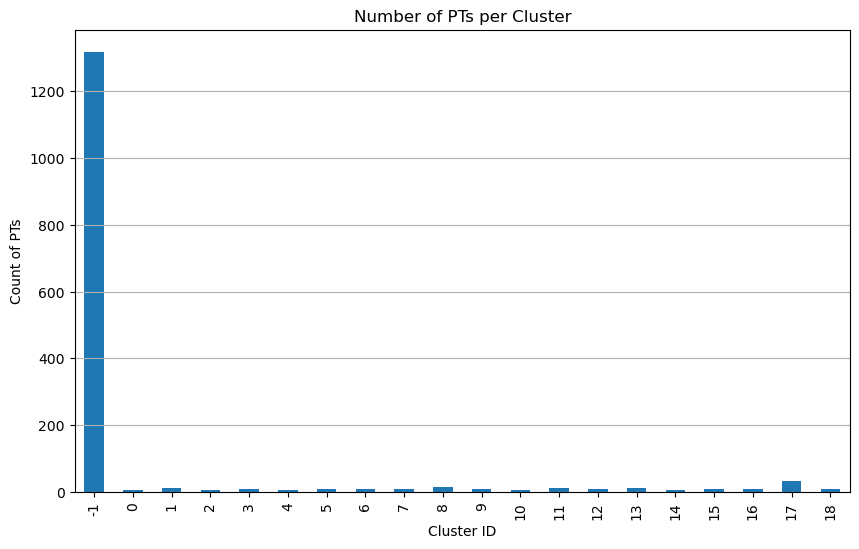

In [107]:
pt_categories['cluster'].value_counts().sort_index().plot(kind='bar', figsize=(10,6))
plt.title("Number of PTs per Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Count of PTs")
plt.grid(axis='y')
plt.show()

In [117]:
pip install umap-learn


Note: you may need to restart the kernel to use updated packages.


C:\Users\utsav\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


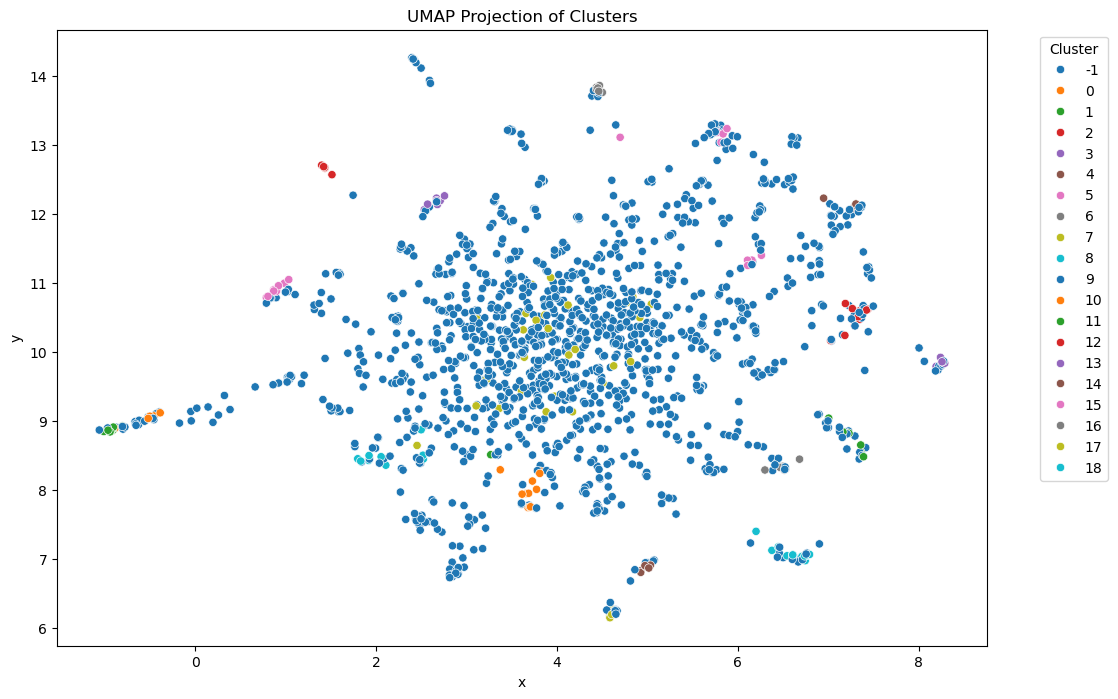

In [207]:
import umap.umap_ as umap
import seaborn as sns

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
X_2d = umap_model.fit_transform(X)

pt_categories['x'] = X_2d[:, 0]
pt_categories['y'] = X_2d[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=pt_categories, x='x', y='y', hue='cluster', palette='tab10')
plt.title('UMAP Projection of Clusters')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
## need to fine tune the hdbscan because pt such as headache, tremor etc are being assigned cluster -1 i.e noise

In [209]:
print(pt_categories['cluster'].value_counts())

cluster
-1     1322
 17      28
 8       14
 10      11
 12      11
 1       11
 15      10
 5        9
 18       9
 16       9
 7        8
 6        8
 11       8
 9        8
 2        7
 3        7
 4        7
 0        5
 13       5
 14       5
Name: count, dtype: int64


In [211]:
# cluster using HDBSCAN
clusterer_updated = hdbscan.HDBSCAN(
    min_cluster_size=3,       # Reduced from 5: more sensitive to small groups
    min_samples=1,            # allows singleton clusters
    metric='euclidean',
    cluster_selection_epsilon=0.0  
)
pt_categories['cluster_updated'] = clusterer_updated.fit_predict(X)
print(pt_categories['cluster_updated'].value_counts()
     )

cluster_updated
-1      704
 89      29
 129     27
 144     22
 150     22
       ... 
 110      3
 20       3
 74       3
 5        3
 117      3
Name: count, Length: 152, dtype: int64


In [239]:
pt_categories[pt_categories['pt']=='tremor'][['pt','cluster_updated','cluster']].head(10)

,pt,cluster_updated,cluster
22,tremor,-1,-1


In [161]:
# headaches and tremor are still being considered as noise
# assigning noises using semantic similarity rather than density
# using cosine siimilarity to the nearest non-noise cluster centroid

In [241]:
# separating clustered and noise data
clustered_pts = pt_categories[pt_categories['cluster_updated'] != -1].copy()
noise_pts = pt_categories[pt_categories['cluster_updated'] == -1].copy()

# figuring out centroids of valid clusters
centroids = (
    clustered_pts.groupby('cluster_updated')['embedding']
    .apply(lambda vectors: np.mean(np.stack(vectors), axis=0))
)

new_clusters = []
for emb in noise_pts['embedding']:
    similarities = cosine_similarity([emb], np.stack(centroids.values))
    best_cluster_idx = np.argmax(similarities)
    best_cluster = centroids.index[best_cluster_idx]
    new_clusters.append(best_cluster)




In [247]:
pt_categories.loc[noise_pts.index, 'cluster_updated1'] = new_clusters

In [251]:
#embedding matrix for reassignment
final_embeddings = pt_categories['embedding'].to_numpy()

# valid cluster points and computing centroids
valid_points = pt_categories[pt_categories['cluster_updated'] != -1]
cluster_ids = valid_points['cluster_updated'].unique()

# centroids
cluster_centroids = {
    cid: np.mean(np.stack(valid_points[valid_points['cluster_updated'] == cid]['embedding']), axis=0)
    for cid in cluster_ids
}

#for all rows with NaN in cluster_updated1, assign nearest cluster
for idx, row in pt_categories[pt_categories['cluster_updated2'].isna()].iterrows():
    emb = row['embedding']
    # Compute cosine similarity with all centroids
    similarities = {
        cid: cosine_similarity([emb], [centroid])[0][0]
        for cid, centroid in cluster_centroids.items()
    }
    # choosing the cluster with highest similarity
    best_cluster = max(similarities, key=similarities.get)
    pt_categories.at[idx, 'cluster_updated2'] = best_cluster

In [253]:
pt_categories[pt_categories['pt']=='headache'][['pt','cluster_updated','cluster','cluster_updated1']].head(10)

,pt,cluster_updated,cluster,cluster_updated1
174,headache,-1,-1,62.0


In [257]:
pt_categories[pt_categories['pt']=='overdose'][['pt','cluster_updated','cluster','cluster_updated1','cluster_updated2']].head(10)

,pt,cluster_updated,cluster,cluster_updated1,cluster_updated2
127,overdose,6,-1,NaN,6.0


In [259]:
print(pt_categories[pt_categories['cluster_updated2'].isna()])


Empty DataFrame
Columns: [pt, type, embedding, cluster, x, y, cluster_updated, cluster_updated1, cluster_updated2]
Index: []


In [261]:
pt_categories[pt_categories['pt'].isin(['headache', 'tremor', 'seizure', 'fall'])]

,pt,type,embedding,cluster,x,y,cluster_updated,cluster_updated1,cluster_updated2
22,tremor,symptom,"[1.4649959, -0.48316148, -0.9034719, 2.4470434...",-1,3.945508,10.638576,-1,56.0,56.0
50,seizure,symptom,"[1.7306701, 0.71743625, -1.800088, 1.2684057, ...",-1,3.416243,11.961082,40,NaN,40.0
90,fall,symptom,"[4.156041, -0.09152586, -0.48218393, -1.866488...",-1,4.145482,10.265221,-1,34.0,34.0
174,headache,symptom,"[-0.09222305, -3.3365529, -0.69833994, 0.27362...",-1,5.239392,10.529562,-1,62.0,62.0


In [279]:
pt_categories['cluster_updated2'].nunique()

151

In [329]:
# grouping pts by cluster and getting the top 3 frequent pts in each cluster
def get_top_pts_by_cluster(df, top_n=3):
    return (
        df.groupby('cluster_updated2')['pt']
        .apply(lambda x: pd.Series(x).value_counts().head(top_n).index.tolist())
    )
top_pts = get_top_pts_by_cluster(pt_categories)

In [359]:
top_pts1 = top_pts.to_dict()
top_pts1

{0.0: ['abortion induced', 'abortion missed', 'abortion spontaneous'],
 1.0: ['patient elopement', 'alopecia', 'alopecia areata'],
 2.0: ['coronavirus infection', 'covid-19', 'covid-19 immunisation'],
 3.0: ['oligomenorrhoea', 'amenorrhoea', 'menstrual disorder'],
 4.0: ['secretion discharge', 'tonsillar hypertrophy', 'hyperprolactinaemia'],
 5.0: ['gamma-glutamyltransferase increased',
  'methaemoglobinaemia',
  'blood immunoglobulin e increased'],
 6.0: ['overdose', 'accidental overdose', 'prescribed overdose'],
 7.0: ['international normalised ratio increased',
  'drug level above therapeutic',
  'drug level increased'],
 8.0: ['dyslipidaemia', 'gestational diabetes', 'type 2 diabetes mellitus'],
 9.0: ['deafness', 'night blindness', 'blindness'],
 10.0: ['influenza', 'vaccination complication', 'vaccination site vesicles'],
 11.0: ['hypertransaminasaemia',
  'tryptase increased',
  'alanine aminotransferase increased'],
 12.0: ['tendon disorder', 'ligament sprain', 'lower limb frac

In [379]:
# keyword matcher for auto-labeling clusters
def assign_cluster_label(top_pts):
    label_map = {}
    for cid, pts in top_pts.items():
        joined = ' '.join(str(p) for p in pts).lower()
        
        if any(x in joined for x in ['overdose', 'toxicity', 'accidental overdose', 'prescribed overdose']):
            label = 'Overdose / Toxicity'

        elif any(x in joined for x in ['rash', 'urticaria', 'eczema', 'pemphigus', 'skin', 'itch', 'angioedema']):
            label = 'Skin & Hypersensitivity'

        elif any(x in joined for x in ['abdominal', 'vomiting', 'diarrhea', 'gastrointestinal', 'constipation', 'nausea']):
            label = 'Gastrointestinal'

        elif any(x in joined for x in ['headache', 'migraine', 'dizziness', 'nystagmus', 'tremor']):
            label = 'Neurological-General'

        elif any(x in joined for x in ['seizure', 'convulsion', 'parkinsonism', 'dyskinesia']):
            label = 'Neurological-Motor'

        elif any(x in joined for x in ['anxiety', 'depression', 'mood', 'stress', 'fear']):
            label = 'Mental Health - Mood'
       
        elif any(x in joined for x in ['agitation', 'hallucination', 'psychosis', 'behavior']):
            label = 'Mental Health - Behavior'
       
      
        elif any(x in joined for x in ['off label', 'expired', 'dose omission', 'misuse','drug ineffective', 'treatment failure']):
            label = 'Administrative Issue'

        
        elif any(x in joined for x in ['joint', 'muscle', 'pain', 'sciatica', 'stiffness','arthralgia','back pain']):
            label = 'Musculoskeletal'

        elif any(x in joined for x in ['cough', 'dyspnoea', 'asthma']):
            label = 'Respiratory'

        elif any(x in joined for x in ['insomnia', 'sleep', 'somnolence', 'abnormal dreams', 'narcolepsy']):
            label = 'Sleep Related'

        elif any(x in joined for x in  ['tachycardia', 'hypertension', 'palpitations', 'bradycardia']):
            label = 'Cardiovascular'
        
        elif any(x in joined for x in ['dysuria', 'urinary', 'kidney', 'nephro', 'prostat']):
            label = 'Urinary / Renal'

        elif any(x in joined for x in ['fever', 'infection', 'sepsis', 'immune', 'pyrexia']):
            label = 'Immune / Infection'
        
        elif any(x in joined for x in ['abortion', 'foetal', 'caesarean', 'amenorrhoea']):
            label = 'Reproductive / Pregnancy'
        
        else:
            label = 'Other'

        label_map[cid] = label
    return label_map
cluster_map_label = assign_cluster_label(top_pts)

In [381]:
pt_categories['reaction_group'] = pt_categories['cluster_updated2'].map(cluster_map_label)


In [385]:
t_categories[pt_categories['cluster_updated2']==100.0]

,pt,type,embedding,cluster,x,y,cluster_updated,cluster_updated1,cluster_updated2,reaction_group
284,facet joint syndrome,symptom,"[0.16869827, -0.021768117, -0.16660744, 1.5389...",-1,3.611202,10.119358,-1,100.0,100.0,Musculoskeletal
436,joint destruction,symptom,"[0.9351308, 1.6776961, -0.22046362, -3.3182442...",-1,6.171364,10.373452,100,NaN,100.0,Musculoskeletal
833,joint range of motion decreased,symptom,"[4.0172358, 1.0131782, 0.67788047, -4.028314, ...",-1,6.195340,10.354118,-1,100.0,100.0,Musculoskeletal
985,joint injury,symptom,"[0.92814475, 2.1537719, -0.5054971, -2.144251,...",-1,6.162674,10.368567,100,NaN,100.0,Musculoskeletal
1194,swollen joint count increased,symptom,"[-3.0310628, 1.2419933, 1.1492022, -0.83359504...",-1,5.988773,10.202757,-1,100.0,100.0,Musculoskeletal
1267,joint dislocation,symptom,"[2.7996066, 1.7064673, 0.15970254, -1.6031554,...",-1,6.171012,10.373162,100,NaN,100.0,Musculoskeletal
1415,joint stiffness,symptom,"[-0.20642366, 0.9264499, 0.28700876, -0.365210...",-1,6.199015,10.270205,-1,100.0,100.0,Musculoskeletal
1452,joint swelling,symptom,"[-2.5475724, 0.02399111, 1.1327039, -1.6855901...",-1,6.196097,10.303915,100,NaN,100.0,Musculoskeletal


In [389]:
pt_categories[pt_categories['cluster_updated2']==78.0][['pt','cluster_updated','cluster','cluster_updated1','cluster_updated2','reaction_group']].head(10)

,pt,cluster_updated,cluster,cluster_updated1,cluster_updated2,reaction_group
30,mental fatigue,78,-1,NaN,78.0,Other
396,fatigue,78,-1,NaN,78.0,Other
597,malaise,-1,-1,78.0,78.0,Other
941,motion sickness,-1,-1,78.0,78.0,Other
1114,chronic fatigue syndrome,78,-1,NaN,78.0,Other


In [345]:
# mapping dictionary: pt → cluster_id
pt_to_cluster = dict(zip(pt_categories['pt'], pt_categories['cluster_updated2']))

conn = psycopg2.connect(database="postgres", user="postgres", password="postgres", host="localhost", port=5432) 
cur = conn.cursor()

for pt, cluster in pt_to_cluster.items():
    cur.execute("""
        UPDATE faers_reactions
        SET reaction_cluster = %s
        WHERE pt = %s;
    """, (int(cluster), pt))

conn.commit()
cur.close()
conn.close()


In [387]:
# mapping dictionary: pt → reaction_group
pt_to_reaction_group = dict(zip(pt_categories['cluster_updated2'], pt_categories['reaction_group']))

conn = psycopg2.connect(database="postgres", user="postgres", password="postgres", host="localhost", port=5432) 
cur = conn.cursor()

for cluster, reaction_group in pt_to_reaction_group.items():
    cur.execute("""
        UPDATE faers_reactions
        SET reaction_group = %s
        WHERE reaction_cluster = %s;
    """, (reaction_group, str(int(cluster))))

conn.commit()
cur.close()
conn.close()

In [393]:
# Trend Analysis
conn = psycopg2.connect(database="postgres", user="postgres", password="postgres", host="localhost", port=5432) 


C:\Users\utsav\AppData\Local\Temp\ipykernel_9048\4074856121.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trend = pd.read_sql(query, conn)


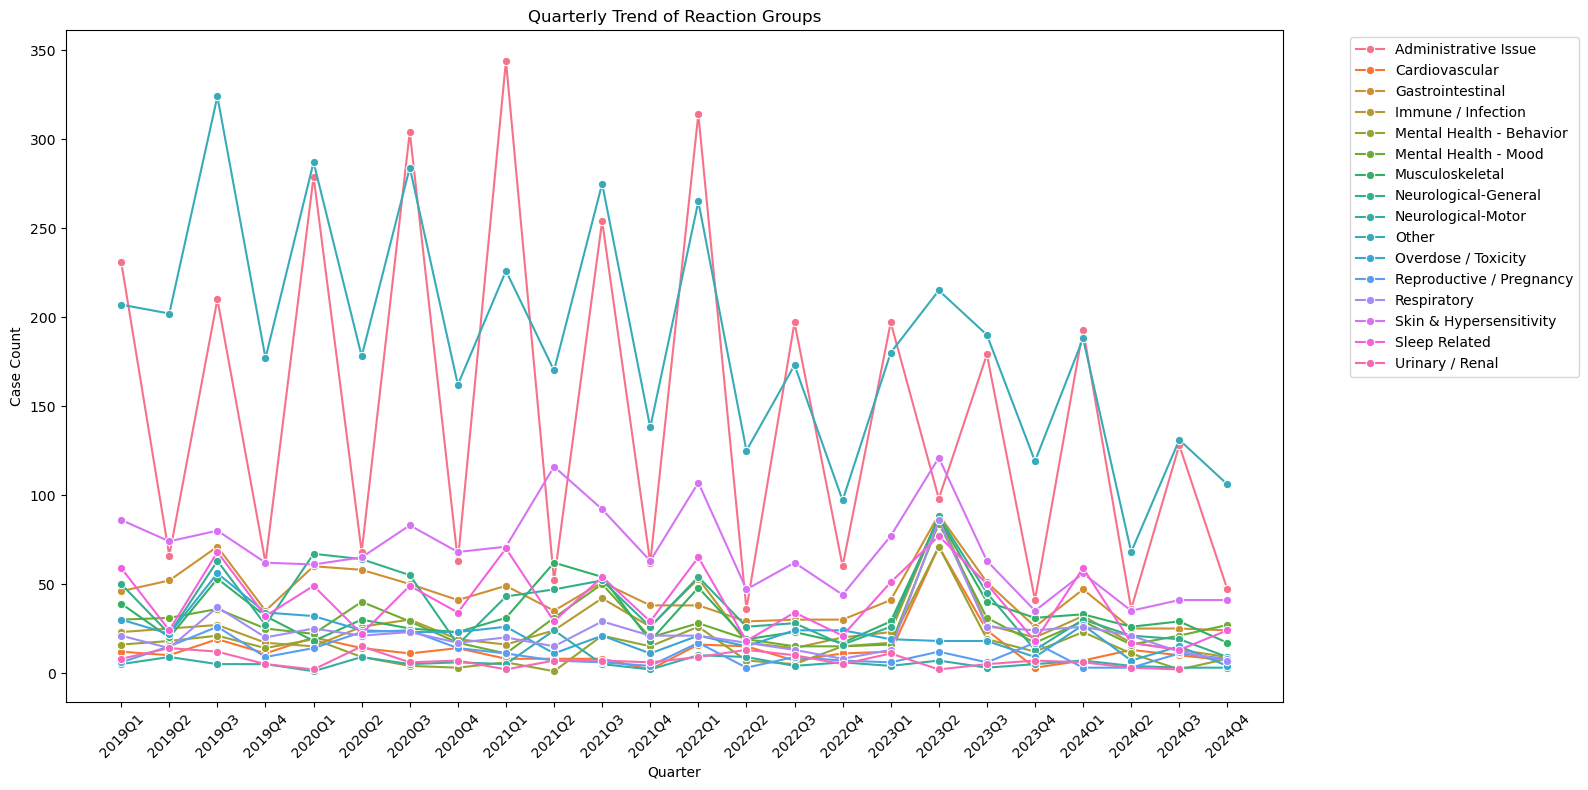

In [395]:
query = """
SELECT data_quarter, reaction_group, COUNT(DISTINCT caseid) AS case_count
FROM faers_reactions
GROUP BY data_quarter, reaction_group
ORDER BY data_quarter;
"""

df_trend = pd.read_sql(query, conn)

# lineplot figure
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_trend, x='data_quarter', y='case_count', hue='reaction_group', marker='o')
plt.xticks(rotation=45)
plt.title('Quarterly Trend of Reaction Groups')
plt.ylabel('Case Count')
plt.xlabel('Quarter')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\utsav\AppData\Local\Temp\ipykernel_9048\486119878.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_age = pd.read_sql(query_age_reaction, conn)


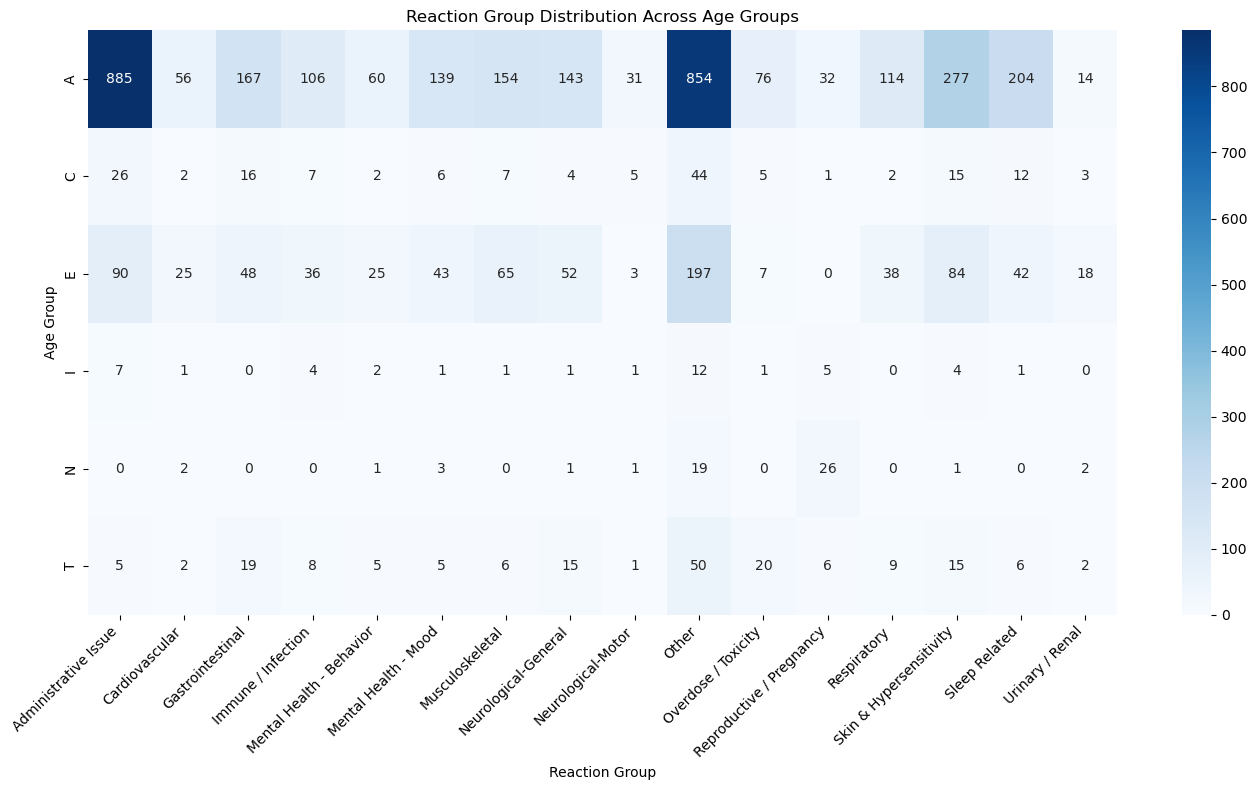

In [403]:
# comparing how reaction groups vary across age groups
query_age_reaction = """
SELECT age_grp, reaction_group, COUNT(DISTINCT fr.caseid) AS case_count
FROM faers_reactions fr inner join
faers_cases fc on fr.primaryid = fc.primaryid
WHERE age_grp IS NOT NULL
GROUP BY age_grp, reaction_group
ORDER BY age_grp;
"""

df_age = pd.read_sql(query_age_reaction, conn)

# pivot table
df_age_pivot = df_age.pivot(index='age_grp', columns='reaction_group', values='case_count').fillna(0)

# heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df_age_pivot, cmap='Blues', annot=True, fmt='.0f')
plt.title("Reaction Group Distribution Across Age Groups")
plt.xlabel("Reaction Group")
plt.ylabel("Age Group")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\utsav\AppData\Local\Temp\ipykernel_9048\2387375130.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sex = pd.read_sql(query_sex_reaction, conn)


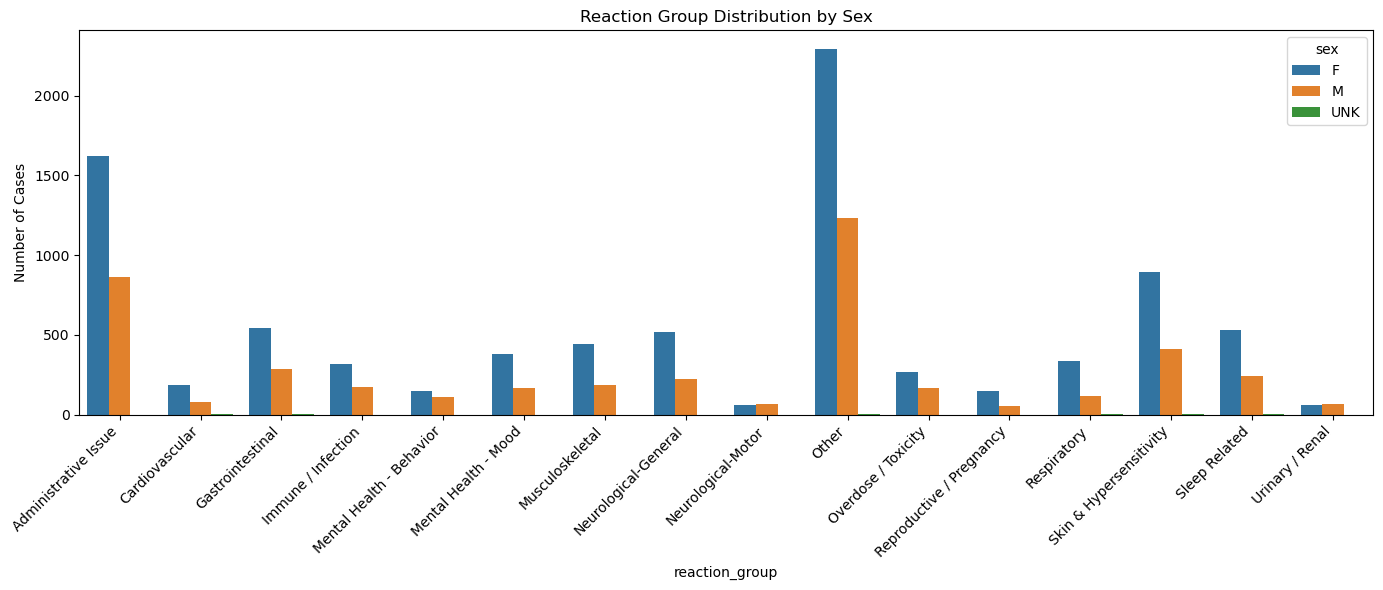

In [405]:
# comparing how reaction groups vary across sex
query_sex_reaction = """
SELECT sex, reaction_group, COUNT(DISTINCT fr.caseid) AS case_count
FROM faers_reactions fr inner join
faers_cases fc on fr.primaryid = fc.primaryid
WHERE sex IS NOT NULL
GROUP BY sex, reaction_group
ORDER BY reaction_group;
"""

df_sex = pd.read_sql(query_sex_reaction, conn)

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=df_sex, x='reaction_group', y='case_count', hue='sex')
plt.title("Reaction Group Distribution by Sex")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()

C:\Users\utsav\AppData\Local\Temp\ipykernel_9048\3545151442.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_drug = pd.read_sql(query_drug_reactions, conn)


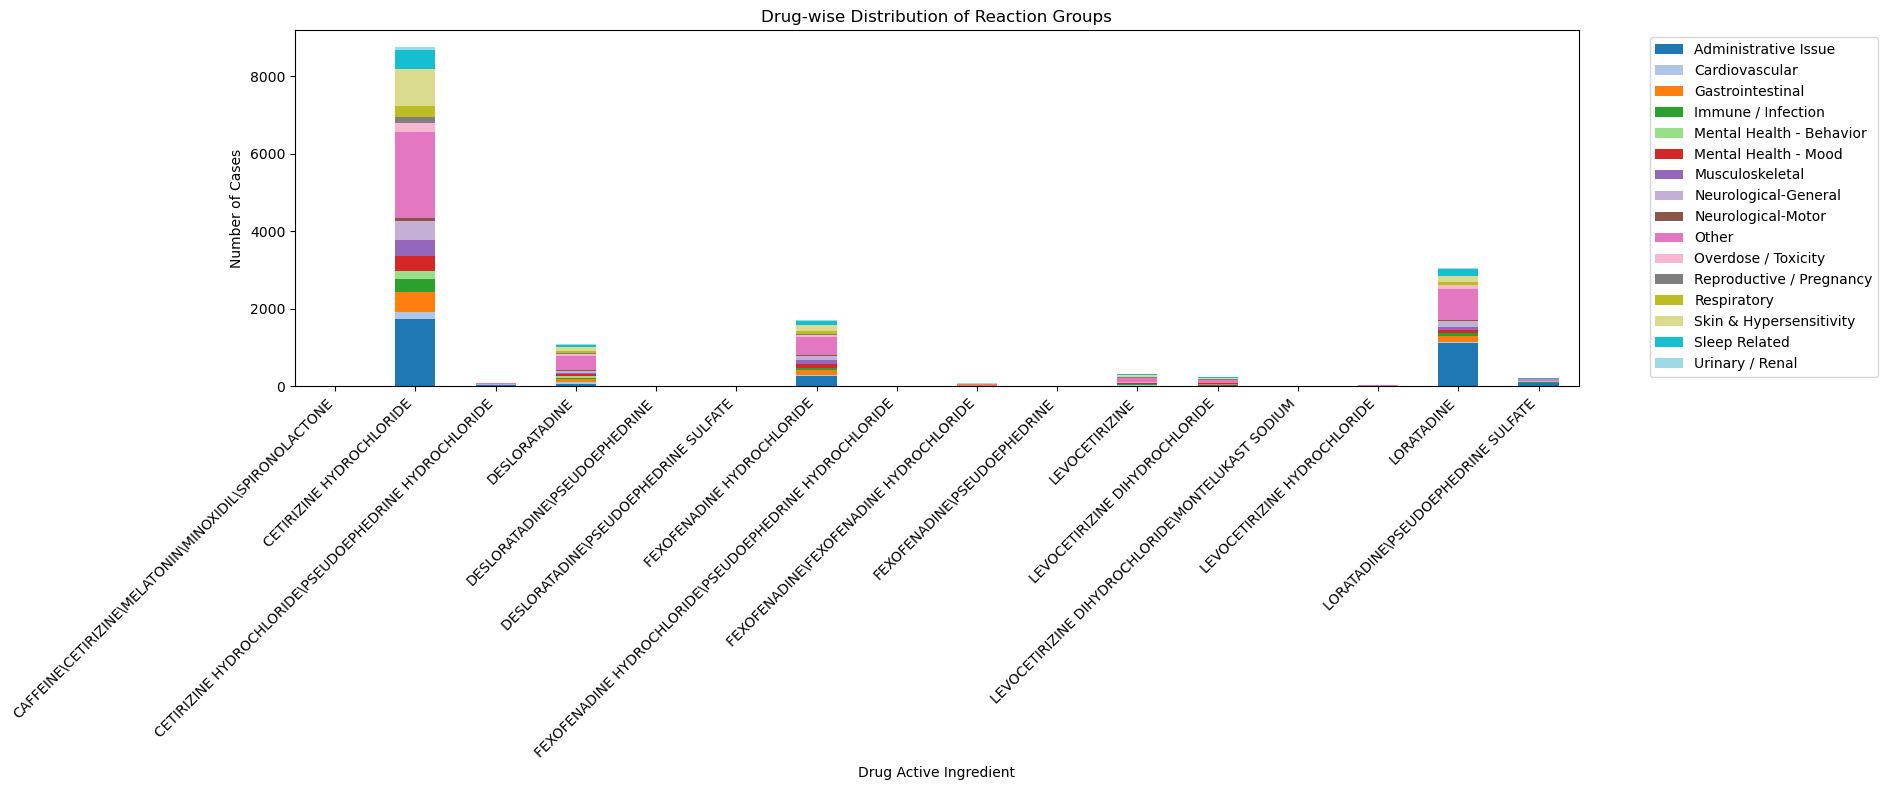

In [415]:
# reaction group and drug analysis
query_drug_reactions = """
SELECT prod_ai, reaction_group, COUNT(DISTINCT fr.caseid) AS case_count
FROM faers_reactions fr inner join
faers_drugs fd on fd.primaryid = fr.primaryid
GROUP BY prod_ai, reaction_group
ORDER BY prod_ai, case_count DESC;
"""

df_drug = pd.read_sql(query_drug_reactions, conn)

# pivotting the table
df_pivot = df_drug.pivot(index='prod_ai', columns='reaction_group', values='case_count').fillna(0)

# plotting a stacked bar chart
df_pivot.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='tab20')
plt.title("Drug-wise Distribution of Reaction Groups")
plt.ylabel("Number of Cases")
plt.xlabel("Drug Active Ingredient")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\utsav\AppData\Local\Temp\ipykernel_9048\512122966.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trend = pd.read_sql(query_trend, conn)


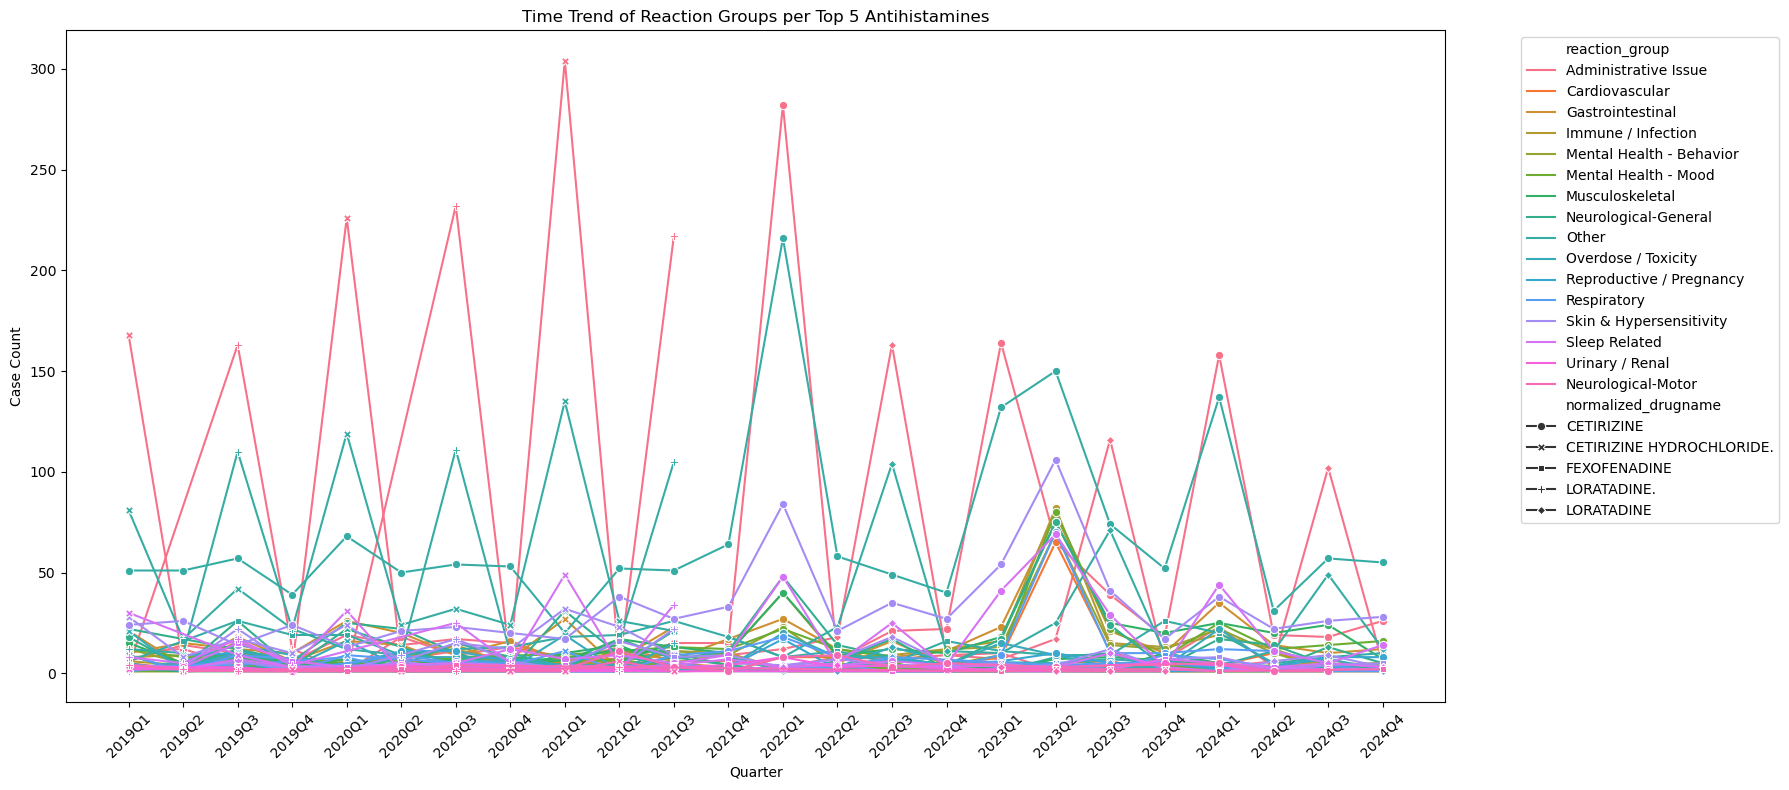

In [427]:
# top 5 drug and reaction group trend over time
query_trend = """
SELECT 
    fr.data_quarter,
    normalized_drugname,
    reaction_group,
    COUNT(DISTINCT fr.caseid) AS case_count
FROM faers_reactions fr inner join
faers_drugs fd on fd.primaryid = fr.primaryid

GROUP BY fr.data_quarter, normalized_drugname, reaction_group
ORDER BY fr.data_quarter, normalized_drugname;
"""

df_trend = pd.read_sql(query_trend, conn)

# getting the top 5 drugs
top_drugs = (
    df_trend.groupby("normalized_drugname")["case_count"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

df_top = df_trend[df_trend["normalized_drugname"].isin(top_drugs)]



plt.figure(figsize=(18, 8))
sns.lineplot(
    data=df_top,
    x="data_quarter",
    y="case_count",
    hue="reaction_group",
    style="normalized_drugname",
    markers=True,
    dashes=False,
)
plt.xticks(rotation=45)
plt.title("Time Trend of Reaction Groups per Top 5 Antihistamines")
plt.ylabel("Case Count")
plt.xlabel("Quarter")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\utsav\AppData\Local\Temp\ipykernel_9048\2355841022.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_agegroup = pd.read_sql(query, conn)


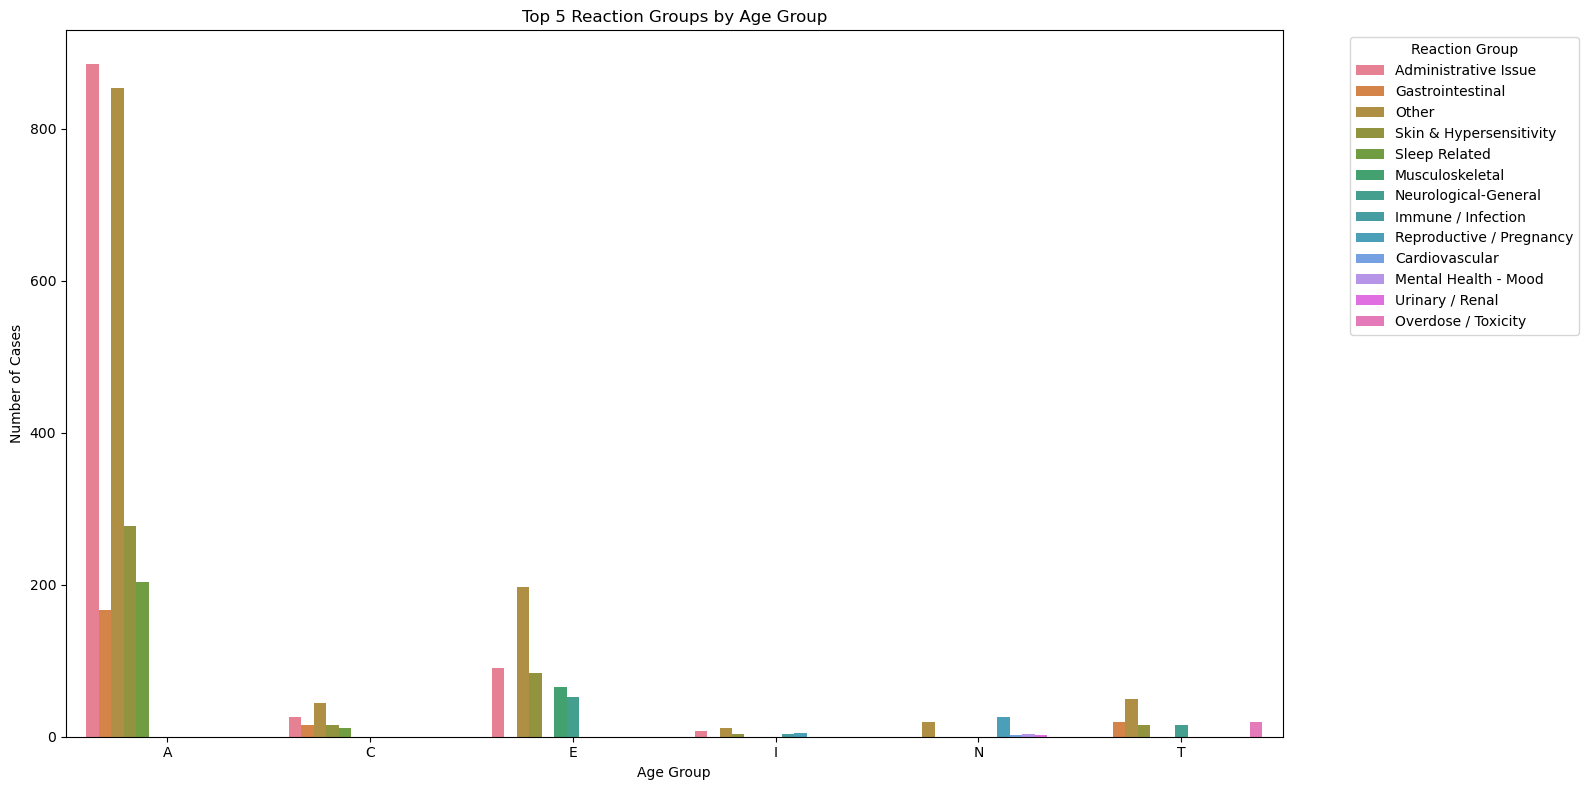

In [429]:
# reaction group count per age group
query = """
SELECT age_grp, reaction_group, COUNT(DISTINCT fr.caseid) AS case_count
FROM faers_reactions fr inner join
faers_cases fc on fr.primaryid = fc.primaryid
WHERE age_grp IS NOT NULL AND reaction_group IS NOT NULL
GROUP BY age_grp, reaction_group
"""

df_agegroup = pd.read_sql(query, conn)

# ranking the reactions with age group
df_agegroup['rank'] = df_agegroup.groupby('age_grp')['case_count'].rank(method='first', ascending=False)

# top 5 reaction groups per age group
top5_rg_df = df_agegroup[df_agegroup['rank'] <= 5]



plt.figure(figsize=(16, 8))
sns.barplot(data=top5_rg_df, x='age_grp', y='case_count', hue='reaction_group')
plt.title("Top 5 Reaction Groups by Age Group")
plt.ylabel("Number of Cases")
plt.xlabel("Age Group")
plt.legend(title="Reaction Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
